## 1. 유저 특성 및 상품 특성 기반 필터링

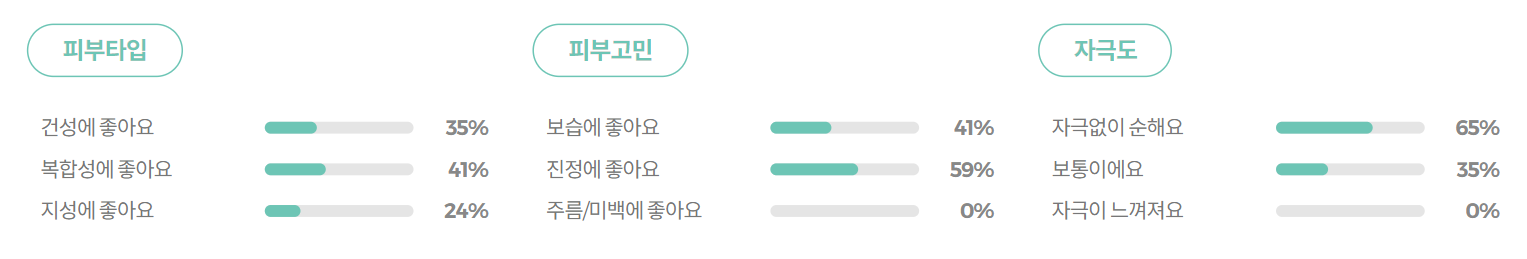

## 1-(1) 데이터 로드 및 이해

In [ ]:
import pandas as pd

# 데이터 읽기
reviews_df = pd.read_csv("Processed_Olive_Young_Cream_Reviews.csv")
products_df = pd.read_csv("Processed_Olive_Young_Cream_Data.csv")

# 데이터 탐색
print(reviews_df.head())
print(products_df.head())

                                           제품명     리뷰어           리뷰어 정보  별점  \
0  [굿즈증정/1+1]닥터지 레드 블레미쉬 클리어 수딩 크림 70ml 1+1 기획     NaN              NaN   4   
1  [굿즈증정/1+1]닥터지 레드 블레미쉬 클리어 수딩 크림 70ml 1+1 기획     수밍배   복합성 겨울쿨톤 각질 모공   5   
2  [굿즈증정/1+1]닥터지 레드 블레미쉬 클리어 수딩 크림 70ml 1+1 기획   후르치키타              NaN   5   
3  [굿즈증정/1+1]닥터지 레드 블레미쉬 클리어 수딩 크림 70ml 1+1 기획  xxjjxx    건성 쿨톤 민감성 트러블   5   
4  [굿즈증정/1+1]닥터지 레드 블레미쉬 클리어 수딩 크림 70ml 1+1 기획     무미니  건성 가을웜톤 미백 블랙헤드   5   

   한달이상사용  재구매여부                                               리뷰내용  \
0       0      0            컵 받고싶어서 샀어요\n크림은 튜브형태러 내줄 생각은 없는건지 궁금해요   
1       0      0   아빠 사드렸는데 좋아해요 근데 바르는게 쫌 별로긴 한데 투브타입으로 나오면 더 좋을 듯   
2       0      0  슬픔이 컵 넘 귀여워요!!!\n슬픔이가 최애라서 슬픔이 나오길 기대했는데 진짜 슬픔...   
3       0      0  닥터지는 사계절 내내 잘 사용하고잇어요 ㅎㅎㅎ\n\n물론 건성피부에게 겨울에는 얼굴...   
4       1      0  사용감이 가벼운 제품이라 여름에 쓰기 너무 좋아요\n수딩크림 같은 제형이고 끈적임이...   

   피부타입_건성에 좋아요  피부타입_복합성에 좋아요  피부타입_지성에 좋아요  피부고민_보습에 좋아요  피부고민_주름/미백에 좋아요  \
0             0    



** 피부타입

지성, 건성, 복합성, 민감성, 약건성, 트러블성, 중성

** 피부톤

쿨톤, 웜톤, 봄웜톤, 여름쿨톤, 가을원톤, 겨울쿨톤

** 피부 고민

잡티, 미백, 주름, 각질, 트러블, 블랙헤드, 피지과다, 민감성, 모공, 탄력, 홍조, 아토피, 다크서클



여기서 수분크림은 피부톤 보다는 피부 타입과 피부 고민의 영향을 많이 받을 것으로 생각.

## 1-(2) 단순 필터링

주어진 유저의 고민, 특징 추출

In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('Processed_Olive_Young_Cream_Reviews.csv')

# 관심 있는 열들
columns_of_interest = {
    '피부타입_건성에 좋아요': '건성',
    '피부타입_복합성에 좋아요': '복합성',
    '피부타입_지성에 좋아요': '지성',
    '피부고민_보습에 좋아요': '보습',
    '피부고민_주름/미백에 좋아요': '주름/미백',
    '피부고민_진정에 좋아요': '진정',
    '자극도_보통이에요': '자극도_보통',
    '자극도_자극없이 순해요': '자극도_없음',
    '자극도_자극이 느껴져요': '자극도_높음'
}

# 사용자 이름 입력 받기
user_name = input("찾고자 하는 사용자 이름을 입력하세요: ")

# 사용자 이름에 해당하는 행 찾기
user_row = df[df['리뷰어'] == user_name]

# 사용자가 입력한 이름이 존재하지 않는 경우 처리
if user_row.empty:
    print(f"사용자 '{user_name}'을(를) 찾을 수 없습니다.")
else:
    # 해당 행에서 값이 1인 열 찾기
    def find_columns_with_value_1(row):
        return [columns_of_interest[col] for col in columns_of_interest if row[col] == 1]

    # find_columns_with_value_1 함수 적용
    result = find_columns_with_value_1(user_row.iloc[0])
    # 리뷰어 정보 추출
    reviewer_info = user_row['리뷰어 정보'].values[0]

    # 결과 출력

    print(f"사용자 '{user_name}' 후기 : {', '.join(result)}")
    print(f"사용자 '{user_name}'의 리뷰어 정보: {reviewer_info}")




찾고자 하는 사용자 이름을 입력하세요: 수밍배
사용자 '수밍배' 후기 : 복합성, 진정, 자극도_보통
사용자 '수밍배'의 리뷰어 정보: 복합성 겨울쿨톤 각질 모공


In [ ]:
import pandas as pd

# CSV 파일 읽기
user_df = pd.read_csv('Processed_Olive_Young_Cream_Reviews.csv')  # 사용자 정보
product_df = pd.read_csv('Processed_Olive_Young_Cream_Data.csv')  # 제품 정보

# 리뷰어 정보에 따른 매핑
reviewer_mapping = {
    '지성': '피부타입_지성에 좋아요',
    '건성': '피부타입_건성에 좋아요',
    '약건성': '피부타입_건성에 좋아요',  # 예를 들어, '약건성'도 '건성'과 관련됨
    '복합성': '피부타입_복합성에 좋아요',
    '각질': '피부고민_보습에 좋아요',
    '트러블': '피부고민_진정에 좋아요',
    '홍조': '피부고민_진정에 좋아요',
    '아토피': '피부고민_진정에 좋아요',
    '민감성': ['자극도_자극없이 순해요', '자극도_보통이에요'],  # 민감성은 여러 열과 관련될 수 있음
    '미백': '피부고민_주름/미백에 좋아요',
    '잡티': '피부고민_주름/미백에 좋아요',
    '주름': '피부고민_주름/미백에 좋아요',
    '다크서클': '피부고민_주름/미백에 좋아요'
}

# 사용자 이름 입력 받기
user_name = input("찾고자 하는 사용자 이름을 입력하세요: ")

# 사용자 이름에 해당하는 행 찾기
user_row = user_df[user_df['리뷰어'] == user_name]

# 사용자가 입력한 이름이 존재하지 않는 경우 처리
if user_row.empty:
    print(f"사용자 '{user_name}'을(를) 찾을 수 없습니다.")
else:
    # 해당 행에서 리뷰어 정보 추출
    reviewer_info = user_row['리뷰어 정보'].values[0]

    # 리뷰어 정보를 기반으로 매핑된 열 찾기
    relevant_columns = []
    for key, value in reviewer_mapping.items():
        if key in reviewer_info:
            if isinstance(value, list):
                relevant_columns.extend(value)
            else:
                relevant_columns.append(value)

    # 제품 정보에서 해당 열이 있는지 확인
    valid_columns = [col for col in relevant_columns if col in product_df.columns]

    # 필터링된 제품 데이터에서 숫자가 큰 제품을 출력
    filtered_products = product_df[valid_columns].max(axis=1)
    product_df['최대값'] = filtered_products

    # 상위 제품 출력
    top_products = product_df.nlargest(10, '최대값')  # 예를 들어, 상위 10개 제품을 출력
    print(f"사용자 '{user_name}'의 리뷰어 정보: {reviewer_info}")
    print("추천 제품:")
    print(top_products)


찾고자 하는 사용자 이름을 입력하세요: 수밍배
사용자 '수밍배'의 리뷰어 정보: 복합성 겨울쿨톤 각질 모공
추천 제품:
      브랜드                                                제품명  원래 가격  최종 가격  \
81     믹순                                       믹순 콩 크림 50ml  35000  31500   
33  파파레서피                                파파레서피 블레미쉬 크림 100ml  38000  17990   
49   피지오겔                            피지오겔 DMT 페이셜 수분크림 150ml  47500  26900   
7    에스트라                         [NEW]에스트라 아토베리어365 크림 80ml      0  33000   
18    웰라쥬           [단독/더블기획]웰라쥬 리얼 히알루로닉 100 크림 50ml 1+1 기획  39000  25900   
22  라로슈포제          라로슈포제 시카플라스트 크림 B5 100ml 기획 (+3ml*2 추가증정)  49000  41650   
72   크리니크   크리니크 쏙보습 크림 (모이스춰 써지 100시간 오토-리플레니싱 하이드레이터) 50ml  48000  38400   
50    아벤느                  아벤느 이드랑스 아쿠아 크림-인-젤 EX 50ml 2입 기획  51000  37910   
92    빌리프  [올리브영 단독] 빌리프 더 트루 크림 모이스춰라이징 밤 30ml 기획 (+에센스3...  31000  24900   
2   에스네이처   [수분천재크림] 에스네이처 아쿠아 스쿠알란 수분크림 60ml 기획 (60ml+30ml)  24000  17900   

     리뷰 수  리뷰 등급  점수 비율_5점  점수 비율_4점  점수 비율_3점  점수 비율_2점  ...  피부타입_건성에 좋아

In [ ]:
import pandas as pd

# CSV 파일 읽기
user_df = pd.read_csv('Processed_Olive_Young_Cream_Reviews.csv')  # 사용자 정보
product_df = pd.read_csv('Processed_Olive_Young_Cream_Data.csv')  # 제품 정보

# 리뷰어 정보에 따른 매핑
reviewer_mapping = {
    '지성': '피부타입_지성에 좋아요',
    '건성': '피부타입_건성에 좋아요',
    '약건성': '피부타입_건성에 좋아요',  # 예를 들어, '약건성'도 '건성'과 관련됨
    '복합성': '피부타입_복합성에 좋아요',
    '각질': '피부고민_보습에 좋아요',
    '트러블': '피부고민_진정에 좋아요',
    '홍조': '피부고민_진정에 좋아요',
    '아토피': '피부고민_진정에 좋아요',
    '민감성': ['자극도_자극없이 순해요', '자극도_보통이에요'],  # 민감성은 여러 열과 관련될 수 있음
    '미백': '피부고민_주름/미백에 좋아요',
    '잡티': '피부고민_주름/미백에 좋아요',
    '주름': '피부고민_주름/미백에 좋아요',
    '다크서클': '피부고민_주름/미백에 좋아요'
}

# 사용자 이름 입력 받기
user_name = input("찾고자 하는 사용자 이름을 입력하세요: ")

# 사용자 이름에 해당하는 행 찾기
user_row = user_df[user_df['리뷰어'] == user_name]

# 사용자가 입력한 이름이 존재하지 않는 경우 처리
if user_row.empty:
    print(f"사용자 '{user_name}'을(를) 찾을 수 없습니다.")
else:
    # 해당 행에서 리뷰어 정보 추출
    reviewer_info = user_row['리뷰어 정보'].values[0]

    # 리뷰어 정보를 기반으로 매핑된 열 찾기
    relevant_columns = []
    for key, value in reviewer_mapping.items():
        if key in reviewer_info:
            if isinstance(value, list):
                relevant_columns.extend(value)
            else:
                relevant_columns.append(value)

    # 제품 정보에서 해당 열이 있는지 확인
    valid_columns = [col for col in relevant_columns if col in product_df.columns]

    # 필터링된 제품 데이터에서 각 조건을 만족하는 정도를 계산
    def calculate_score(row, valid_columns):
        return sum(row[col] == 1 for col in valid_columns if col in row.index)

    # 제품 데이터 복사 및 점수 계산
    product_df_copy = product_df.copy()
    product_df_copy['score'] = product_df_copy.apply(lambda row: calculate_score(row, valid_columns), axis=1)

    # 상위 제품 선택 (예: 점수가 높은 상위 10개 제품 선택)
    top_products = product_df_copy.nlargest(10, 'score')

    # 상위 제품의 이름을 가져옵니다 (이 예제에서는 '제품명'이라는 열이 있다고 가정)
    top_product_names = top_products['제품명'].tolist()
    print(top_product_names)

    # 'user_df'에서 상위 제품명으로 필터링하고 리뷰 내용 추출
    filtered_user_reviews = user_df[user_df['제품명'].isin(top_product_names)][['제품명', '리뷰내용']]

    # 상위 제품 정보와 리뷰 내용을 병합
    filtered_products_df = top_products.merge(filtered_user_reviews, on='제품명', how='left')

    # 결과 출력
    print(f"사용자 '{user_name}'의 리뷰어 정보: {reviewer_info}")
    print("추천 제품:")
    print(filtered_products_df)




찾고자 하는 사용자 이름을 입력하세요: 수밍배
['[굿즈증정/1+1]닥터지 레드 블레미쉬 클리어 수딩 크림 70ml 1+1 기획', '라로슈포제 시카플라스트 밤 B5+ 100ml 기획 (+3ml 추가증정)', '[수분천재크림] 에스네이처 아쿠아 스쿠알란 수분크림 60ml 기획 (60ml+30ml)', '[단독기획] 토리든 다이브인 수딩크림 100ml 기획(+수딩크림 20ml)', '[수딩진정]넘버즈인 1번 판토텐산 액티브 수딩크림 80ml+80ml 더블 기획', '[화잘먹크림/단독기획]더하르나이 시카이드 크림 100ml + 30ml 기획', '[7월 올영픽/단독기획] 파티온 노스카나인 트러블 크림 45ml 기획(+크림5ml, 세럼15ml 증정)', '[NEW]에스트라 아토베리어365 크림 80ml', '[화해1위/수분쿨링진정] 에스네이처 아쿠아 오아시스 수분 젤크림 90ml 기획 (+카밍패드 2매)', '[단독기획] 메이크프렘 인테카 수딩크림 50ml+31ml 기획']
사용자 '수밍배'의 리뷰어 정보: 복합성 겨울쿨톤 각질 모공
추천 제품:
      브랜드                                                제품명  원래 가격  최종 가격  \
0     닥터지        [굿즈증정/1+1]닥터지 레드 블레미쉬 클리어 수딩 크림 70ml 1+1 기획  38000  28800   
1     닥터지        [굿즈증정/1+1]닥터지 레드 블레미쉬 클리어 수딩 크림 70ml 1+1 기획  38000  28800   
2     닥터지        [굿즈증정/1+1]닥터지 레드 블레미쉬 클리어 수딩 크림 70ml 1+1 기획  38000  28800   
3     닥터지        [굿즈증정/1+1]닥터지 레드 블레미쉬 클리어 수딩 크림 70ml 1+1 기획  38000  28800   
4     닥터지        [굿즈증정/1+1]닥터지 레드 블레미쉬 클리어 수딩 크림 70ml 1+1 기획  38000  28800  

## 2. Semantic Search

1. 제품별 제품명 + 리뷰 내용을 Sentence Transformer를 활용하여 임베딩 벡터를 계산.

2. 주어진 유저 query에 대해, Sentence Transformer로 임베딩을 한 뒤, 이미 구해진 제품별 임베딩 벡터들간의 코사인 유사도를 계산.

3. 코사인 유사도를 기반으로, 제품별 추천을 구현.

In [ ]:
# SentenceTransformer 모델 로드
model = SentenceTransformer('bespin-global/klue-sroberta-base-continue-learning-by-mnr') # 다른 임베딩 모델을 서치해도 됩니다. (권장)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.28k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/796 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/752k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
#위의 코드에서 필터링된 df을 semantic search 용도로 사용
reviews_df = filtered_products_df.loc[:, ['제품명', '리뷰내용']]
print(reviews_df)

                                                  제품명  \
0         [굿즈증정/1+1]닥터지 레드 블레미쉬 클리어 수딩 크림 70ml 1+1 기획   
1         [굿즈증정/1+1]닥터지 레드 블레미쉬 클리어 수딩 크림 70ml 1+1 기획   
2         [굿즈증정/1+1]닥터지 레드 블레미쉬 클리어 수딩 크림 70ml 1+1 기획   
3         [굿즈증정/1+1]닥터지 레드 블레미쉬 클리어 수딩 크림 70ml 1+1 기획   
4         [굿즈증정/1+1]닥터지 레드 블레미쉬 클리어 수딩 크림 70ml 1+1 기획   
5             라로슈포제 시카플라스트 밤 B5+ 100ml 기획 (+3ml 추가증정)   
6             라로슈포제 시카플라스트 밤 B5+ 100ml 기획 (+3ml 추가증정)   
7             라로슈포제 시카플라스트 밤 B5+ 100ml 기획 (+3ml 추가증정)   
8             라로슈포제 시카플라스트 밤 B5+ 100ml 기획 (+3ml 추가증정)   
9             라로슈포제 시카플라스트 밤 B5+ 100ml 기획 (+3ml 추가증정)   
10   [수분천재크림] 에스네이처 아쿠아 스쿠알란 수분크림 60ml 기획 (60ml+30ml)   
11   [수분천재크림] 에스네이처 아쿠아 스쿠알란 수분크림 60ml 기획 (60ml+30ml)   
12   [수분천재크림] 에스네이처 아쿠아 스쿠알란 수분크림 60ml 기획 (60ml+30ml)   
13   [수분천재크림] 에스네이처 아쿠아 스쿠알란 수분크림 60ml 기획 (60ml+30ml)   
14   [수분천재크림] 에스네이처 아쿠아 스쿠알란 수분크림 60ml 기획 (60ml+30ml)   
15          [단독기획] 토리든 다이브인 수딩크림 100ml 기획(+수딩크림 20ml)   
16          [단독기획] 토리든 다이브인 수딩크

In [ ]:
# 제품명 임베딩
product_names = reviews_df['제품명'].astype(str).tolist()
product_name_embeddings_dict = {}
for product_name in tqdm(product_names, desc="Encoding product names"):
    product_name_embeddings_dict[product_name]= model.encode(product_name)

# reviews_df에 임베딩 추가
reviews_df['product_name_embedding'] = reviews_df['제품명'].map(product_name_embeddings_dict)

# list 형식으로 변환
reviews_df['product_name_embedding'] = reviews_df['product_name_embedding'].apply(lambda x: x.tolist())


Encoding product names: 100%|██████████| 50/50 [00:09<00:00,  5.40it/s]


In [ ]:
# 리뷰 내용 임베딩
review_texts = reviews_df['리뷰내용'].astype(str).tolist()
review_embeddings = []
for review_text in tqdm(review_texts, desc="Encoding review texts"):
    review_embeddings.append(model.encode(review_text))

# reviews_df에 임베딩 추가
reviews_df['review_content_embedding'] = review_embeddings

# list 형식으로 변환
reviews_df['review_content_embedding'] = reviews_df['review_content_embedding'].apply(lambda x: x.tolist())

# 데이터프레임 저장
#reviews_df.to_csv("df_with_embeddings.csv", index=False) (용량이 넘칠 것입니다. VectorDB를 사용한다면 효과적인 저장이 가능하나, 본 수업의 Scope를 너무 벗어나므로 다루지 않음.)

Encoding review texts: 100%|██████████| 50/50 [00:28<00:00,  1.75it/s]


In [ ]:
# 유사도 계산 함수
def calculate_cosine_similarity(query_embedding, embeddings):
    similarities = cosine_similarity([query_embedding], embeddings)[0]
    return similarities

# 사용자의 쿼리에 대한 임베딩 생성 및 유사도 계산 및 높은 유사도 순 추천 아이템 출력
def get_top_products_by_similarity(query, reviews_df):
    query_embedding = model.encode(query)

    # 제품명과 유사도 계산 칼럼 추가
    product_name_embeddings = np.array(reviews_df['product_name_embedding'].tolist())
    reviews_df['name_cosine_similarity'] = calculate_cosine_similarity(query_embedding, product_name_embeddings)

    # 리뷰와 유사도 계산 칼럼 추가
    review_content_embeddings = np.array(reviews_df['review_content_embedding'].tolist())
    reviews_df['review_cosine_similarity'] = review_similarities = calculate_cosine_similarity(query_embedding, review_content_embeddings)

    reviews_df['simlarity_average'] = reviews_df[['name_cosine_similarity', 'review_cosine_similarity']].mean(axis=1)

    # 'embedding_average'를 기준으로 내림차순 정리 (수정 가능)
    sorted_reviews_df = reviews_df.sort_values(by='simlarity_average', ascending=False)
    print(sorted_reviews_df)
    print(sorted_reviews_df['제품명'])

In [ ]:
# 테스트 쿼리 (수분 크림의 경우)

queries = ["화사해지는 수분크림"]

In [ ]:
for query in queries:
  print(f"Query: {query}")
  print(get_top_products_by_similarity(query, reviews_df))
  print()

Query: 화사해지는 수분크림
                                                  제품명  \
13   [수분천재크림] 에스네이처 아쿠아 스쿠알란 수분크림 60ml 기획 (60ml+30ml)   
14   [수분천재크림] 에스네이처 아쿠아 스쿠알란 수분크림 60ml 기획 (60ml+30ml)   
42  [화해1위/수분쿨링진정] 에스네이처 아쿠아 오아시스 수분 젤크림 90ml 기획 (+...   
10   [수분천재크림] 에스네이처 아쿠아 스쿠알란 수분크림 60ml 기획 (60ml+30ml)   
26          [화잘먹크림/단독기획]더하르나이 시카이드 크림 100ml + 30ml 기획   
25          [화잘먹크림/단독기획]더하르나이 시카이드 크림 100ml + 30ml 기획   
28          [화잘먹크림/단독기획]더하르나이 시카이드 크림 100ml + 30ml 기획   
43  [화해1위/수분쿨링진정] 에스네이처 아쿠아 오아시스 수분 젤크림 90ml 기획 (+...   
29          [화잘먹크림/단독기획]더하르나이 시카이드 크림 100ml + 30ml 기획   
11   [수분천재크림] 에스네이처 아쿠아 스쿠알란 수분크림 60ml 기획 (60ml+30ml)   
12   [수분천재크림] 에스네이처 아쿠아 스쿠알란 수분크림 60ml 기획 (60ml+30ml)   
36                         [NEW]에스트라 아토베리어365 크림 80ml   
39                         [NEW]에스트라 아토베리어365 크림 80ml   
9             라로슈포제 시카플라스트 밤 B5+ 100ml 기획 (+3ml 추가증정)   
41  [화해1위/수분쿨링진정] 에스네이처 아쿠아 오아시스 수분 젤크림 90ml 기획 (+...   
40  [화해1위/수분쿨링진정] 에스네이처 아쿠아 오아시스 수분 젤크림 90ml 기획 (+...   
44  [화해1위/수분쿨

In [ ]:
# 테스트 쿼리 (수분 크림의 경우)

queries = ["갑자기 여드름 났을 때 진정시키기 좋은 크림",
           "안끈적거리고 가벼운 크림",
           "극건성에 좋은 꾸덕한 크림",
           "메이크업용 수분크림"]